<a href="https://colab.research.google.com/github/JALVARADORUIZ/UB_Proyecto/blob/main/Test__NN__Regression_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías


In [ ]:
import os
import keras
import skimage
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.8.0


In [ ]:
import numpy as np 
import pandas as pd
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.svm import SVC

from tqdm import tqdm
tqdm.pandas()


dim = 128

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [ ]:
import pandas as pd

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
#Define a Convolutional Neural Network Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Modelo

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TFM_Máster BDDS/datawine/df_img_processed.csv')
df = df.iloc[:,:15]

In [ ]:
df.head(1)

,winery,product,region,country_code,rating,variety,price_usd,image,continente,country_code_clean,price_cat,rating_cat,quality,color,image_clean
0,louis jadot,louis jadot corton grand cru greves 2006,corton grand cru,fr,4.0,pinot noir,89.99,vintage-images/TJyGXkvdQsSBDVqT8hHDtg_pl_480x6...,europe,france,alto,muy bueno,grand cru,red,TJyGXkvdQsSBDVqT8hHDtg_pl_480x640.png


In [ ]:
'''df_variety = df['variety'].value_counts().rename_axis('variety').to_frame('counts')
df_variety_selected = df_variety[:15]
list_variety = list(df_variety_selected.index)

def transform_variety(variety, list_variety):
  if variety in list_variety:
    return variety
  else:
    return "other"

df['variety'] = df.progress_apply(lambda x:transform_variety(x.variety,list_variety), axis=1)'''


100%|██████████| 5457/5457 [00:00<00:00, 57984.59it/s]


In [ ]:
X = df['image_clean'].values
y = df['price_usd']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


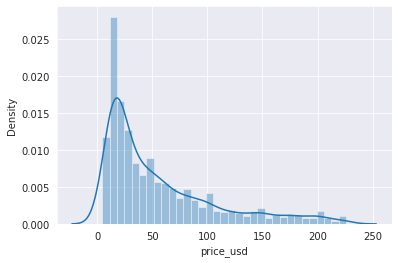

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(y)

In [ ]:
'''images = []
path = "/content/drive/MyDrive/TFM_Máster BDDS/datawine/vintage-images/"
for i in X:
  image = cv2.imread(os.path.join(path, i), cv2.IMREAD_COLOR)
  image = cv2.resize(image, (dim, dim))
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  images.append(image)
'''

In [ ]:
'''X = np.array(images)'''

In [ ]:
with open('/content/drive/MyDrive/TFM_Máster BDDS/128_features_cnn_price.npy', 'rb') as f:
    X= np.load(f)

In [ ]:
X.shape

(5457, 128, 128, 3)

In [ ]:
y = np.array(y)

In [ ]:
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
print(X_test.shape)
print(X.shape)
print(y.shape)
print(y_test.shape)

(1092, 128, 128, 3)
(4365, 128, 128, 3)
(4365,)
(1092,)


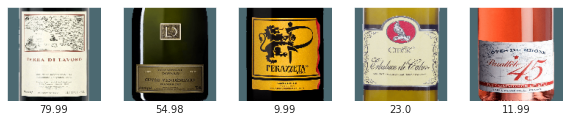

In [ ]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(y[i])
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
#Define a Convolutional Neural Network Model

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (128,128,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='relu'))
learning_rate = 0.001
model.compile(loss = 'mse',
              optimizer = Adam(learning_rate),
                metrics=['accuracy','mae', 'mse'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 batch_normalization_24 (Bat  (None, 126, 126, 16)     64        
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 124, 124, 16)      2320      
                                                                 
 batch_normalization_25 (Bat  (None, 124, 124, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                      

In [ ]:
save_at = "model_regression.hdf5"
save_best2 = ModelCheckpoint (save_at, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')
#set up the x, y for training 

X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.15, random_state=13)
img_rows, img_cols = 128, 128
input_shape = (img_rows, img_cols, 3)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 3)

In [ ]:
history = model.fit( X_train, Y_train, 
                    epochs = 30, batch_size = 32, 
                   verbose=1, 
                   validation_data = (X_val, Y_val))

Epoch 1/15
38/38 [==============================] - 23s 575ms/step - loss: 2995.8140 - accuracy: 0.0000e+00 - mae: 40.6312 - mse: 2995.8140 - val_loss: 3304.7488 - val_accuracy: 0.0000e+00 - val_mae: 36.5377 - val_mse: 3304.7488
Epoch 2/15
38/38 [==============================] - 22s 568ms/step - loss: 2336.5879 - accuracy: 0.0000e+00 - mae: 36.2328 - mse: 2336.5879 - val_loss: 3763.6279 - val_accuracy: 0.0000e+00 - val_mae: 39.5121 - val_mse: 3763.6279
Epoch 3/15
38/38 [==============================] - 22s 570ms/step - loss: 2008.3411 - accuracy: 0.0000e+00 - mae: 33.2163 - mse: 2008.3411 - val_loss: 3327.4141 - val_accuracy: 0.0000e+00 - val_mae: 37.6402 - val_mse: 3327.4141
Epoch 4/15
38/38 [==============================] - 21s 565ms/step - loss: 1762.8392 - accuracy: 0.0000e+00 - mae: 30.6254 - mse: 1762.8392 - val_loss: 3070.9229 - val_accuracy: 0.0000e+00 - val_mae: 37.0434 - val_mse: 3070.9231
Epoch 5/15
38/38 [==============================] - 22s 568ms/step - loss: 1417.1920

In [ ]:
plt.figure(figsize=(6, 5))
# training loss
plt.plot(history.history['accuracy'], color='r')
#validation loss
plt.plot(history.history['val_accuracy'], color='g')
plt.show()

In [ ]:
plt.figure(figsize=(6, 5))
# training loss
plt.plot(history.history['mae'], color='r')
#validation loss
plt.plot(history.history['val_mae'], color='g')
plt.show()

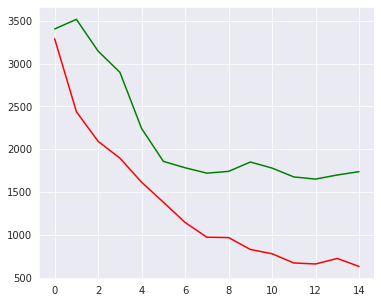

In [ ]:
plt.figure(figsize=(6, 5))
# training loss
plt.plot(history.history['loss'], color='r')
#validation loss
plt.plot(history.history['val_loss'], color='g')
plt.show()

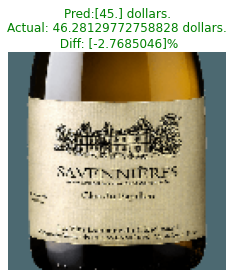

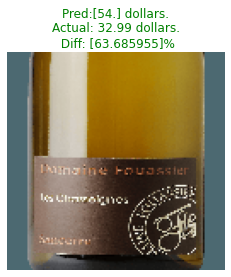

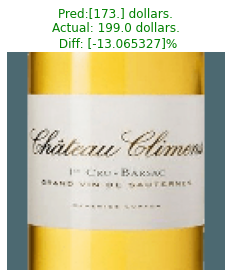

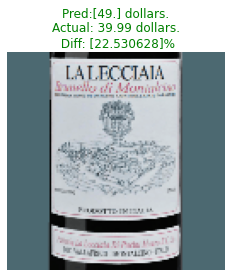

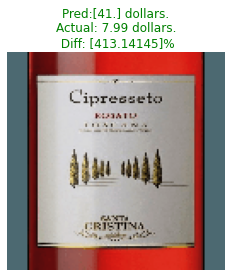

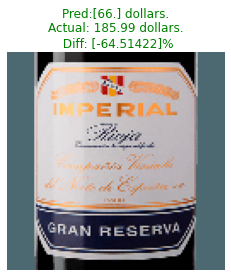

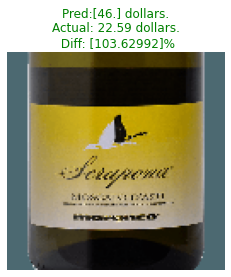

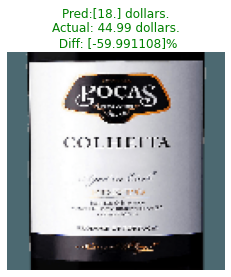

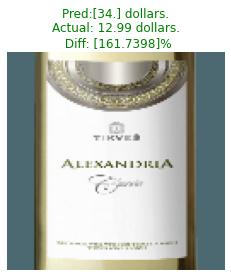

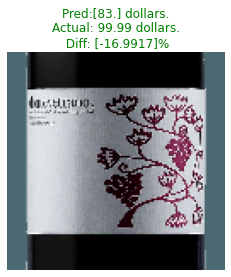

In [ ]:
Y_pred = np.round(model.predict(X_test))
np.random.seed(23)
for rand_num in np.random.randint(0, len(y_test), 10):
    plt.figure()
    plt.imshow(X_test[rand_num].reshape(128, 128,3),cmap='gray'), plt.axis('off')
    plt.title('Pred:'+str(Y_pred[rand_num]) +' dollars.'+'\n' +'Actual: '+str(y_test[rand_num])+' dollars.'+ '\n Diff: '+str(((Y_pred[rand_num]/y_test[rand_num])-1)*100)+'%', color='g')

In [ ]:
model.fit( X_train, Y_train, 
                    epochs = 5, batch_size = 100, 
                   verbose=1)

Epoch 1/5
38/38 [==============================] - 22s 575ms/step - loss: 562.3209 - mae: 16.1672 - mse: 562.3209
Epoch 2/5
38/38 [==============================] - 22s 575ms/step - loss: 619.2681 - mae: 16.4987 - mse: 619.2681
Epoch 3/5
38/38 [==============================] - 22s 571ms/step - loss: 556.9007 - mae: 15.7642 - mse: 556.9007
Epoch 4/5
38/38 [==============================] - 22s 568ms/step - loss: 548.2115 - mae: 15.7323 - mse: 548.2115
Epoch 5/5
38/38 [==============================] - 22s 573ms/step - loss: 515.6724 - mae: 15.0036 - mse: 515.6724


In [ ]:
s_y_test = pd.Series(y_test)
s_y_pred = pd.Series(Y_pred[:,0]) 


In [ ]:
s_y_test = s_y_test.to_frame('y_test')
s_y_pred = s_y_pred.to_frame('y_pred')

In [ ]:
import math

In [ ]:
testing = pd.concat([s_y_test, s_y_pred], axis=1)
testing['error'] = (testing['y_pred']-testing['y_test'])
testing['error_normal'] = testing['error']**2
testing['error_normal'] = testing['error_normal']**(1/2)
testing['error_perc'] = round(testing['error_normal']/testing['y_test']*100,2)

In [ ]:
testing

,y_test,y_pred,error,error_normal,error_perc
0,42.99000,16.0,-26.99000,26.99000,62.78
1,175.00000,21.0,-154.00000,154.00000,88.00
2,158.00000,141.0,-17.00000,17.00000,10.76
3,105.00000,64.0,-41.00000,41.00000,39.05
4,34.49000,30.0,-4.49000,4.49000,13.02
...,...,...,...,...,...
1087,125.87000,78.0,-47.87000,47.87000,38.03
1088,14.99000,45.0,30.01000,30.01000,200.20
1089,81.41148,21.0,-60.41148,60.41148,74.21
1090,9.99000,30.0,20.01000,20.01000,200.30


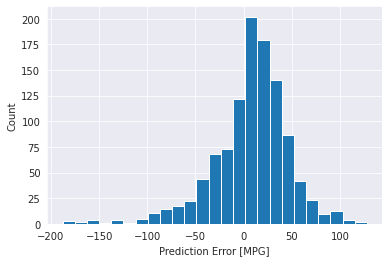

In [ ]:
plt.hist(testing['error'], bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [ ]:
error_bounderies = np.sum(testing['error_normal'])/np.sum(testing['y_test'])
y_test_up = y_test * (1+error_bounderies)
y_test_dw = y_test * (1-error_bounderies)

In [ ]:
sum_error = round(np.sum(testing['error_normal'])/np.sum(testing['y_test']),2)*100
print(f'Error percentage: {sum_error}%')

Error percentage: 56.00000000000001%


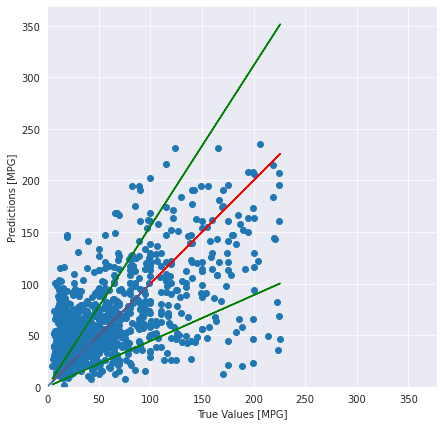

In [ ]:
est_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(7, 7))
plt.scatter(y_test, Y_pred)
plt.plot(y_test,y_test, color = 'r')
plt.plot(y_test,y_test_up, color = 'g')
plt.plot(y_test,y_test_dw, color = 'g')
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

35/35 - 1s - loss: 1584.5337 - mae: 28.5832 - mse: 1584.5337 - 1s/epoch - 32ms/step

Test accuracy: [1584.53369140625, 28.58316421508789, 1584.53369140625]


#Guardado del modelo

In [ ]:
import joblib

joblib.dump(model, '/content/drive/MyDrive/TFM_Máster BDDS/Modelos/modelo_cnn_precio_continua.pkl')

['/content/drive/MyDrive/TFM_Máster BDDS/Modelos/modelo_cnn_precio_continua.pkl']